### Build a basic chatbot

In [1]:
from typing import Annotated
# the annotated is use for 'combbining a type with extra metadata'
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages
# add_messages is a reducer

In [ ]:
class State(TypedDict):
    # Messages have the type "list". The 'add_messages' function
    # in the annotation defines how this state key should be updated
    # (in this case, it append messages to the list, rather than overwriting them)

    messages:Annotated[list,add_messages]
    # The add_message function tells the langraph to update this message instead of replacing them

graph_builder = StateGraph(State)
# The graph_builder object will be used to add nodes, define logic flow and build the final graph

In [ ]:
graph_builder
# graph_builder is like the architect that lays out how our ai agent flows, step by step - it connects 
# state, steps logic and termination


# StateGraph --> it defines the structire of our chatbot as a "State machine"
# we will add nodes to represent the llm and functions our chatbot can call and edges to 
# specify how the bot should transition between these function

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

llm = ChatGroq(model="llama3-8b-8192")

In [14]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001F158F5EF90>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001F158F5F8C0>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [5]:
# Node functionality
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [6]:
graph_builder= StateGraph(State)

## Adding node
graph_builder.add_node("llmchatbot",chatbot)
## Adding Edges
graph_builder.add_edge(START,"llmchatbot")
graph_builder.add_edge("llmchatbot",END)

## Compile the graph
graph= graph_builder.compile()

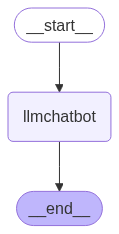

In [19]:
## Visualize the graph 
from IPython.display import Image,display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [8]:
graph.invoke({"messages":"Hi"})

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='c3051f31-5318-4e95-beae-26850e1dd603'),
  AIMessage(content="Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 11, 'total_tokens': 36, 'completion_time': 0.031768655, 'prompt_time': 0.007982144, 'queue_time': 0.489223737, 'total_time': 0.039750799}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_2717d04279', 'finish_reason': 'stop', 'logprobs': None}, id='run--dd440442-570f-4601-957f-8116d619415a-0', usage_metadata={'input_tokens': 11, 'output_tokens': 25, 'total_tokens': 36})]}

In [11]:
graph.invoke({"messages":"Tell me about pulchowk engineering campus"})

{'messages': [HumanMessage(content='Tell me about pulchowk engineering campus', additional_kwargs={}, response_metadata={}, id='f071c355-be53-4b23-8dbe-0f3c46258e3d'),
  AIMessage(content='Pulchowk Engineering Campus (PEC) is a prestigious institution located in Pulchowk, Lalitpur, Nepal. It is a constituent campus of the Institute of Engineering (IOE), Tribhuvan University (TU), and is one of the oldest and most reputed engineering institutions in Nepal.\n\nHere are some key facts about Pulchowk Engineering Campus:\n\n1. History: The campus was established in 1959 as the Institute of Engineering, Pulchowk, and has since become one of the most respected engineering institutions in Nepal.\n2. Programs: PEC offers undergraduate and graduate programs in various fields of engineering, including:\n\t* Civil Engineering\n\t* Mechanical Engineering\n\t* Electrical Engineering\n\t* Computer Engineering\n\t* Electronics and Communication Engineering\n\t* Architecture\n3. Faculty: The campus has

In [13]:
graph.invoke({"messages":"https://github.com/SangamSilwal can you review this github repo"})

{'messages': [HumanMessage(content='https://github.com/SangamSilwal can you review this github repo', additional_kwargs={}, response_metadata={}, id='24468d98-161c-4a4e-a9ea-43e8439eded6'),
  AIMessage(content="I'd be happy to help review the GitHub repository at the provided link.\n\n**Initial Observations**\n\nThe repository appears to be a personal portfolio of Sangam Silwal, a software developer. The repository contains a mix of projects and experiments in various programming languages and technologies.\n\n**Organization and Structure**\n\nThe repository is well-organized, with separate folders for each project or experiment. Each folder contains relevant files, such as code, READMEs, and sometimes even videos or images. The folder names are descriptive, making it easy to navigate and find specific projects.\n\n**Code Quality and Readability**\n\nThe code quality and readability vary across projects. Some projects have clean, well-organized code with proper indentation, comments, a